In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [5]:
data = pd.read_csv("processedsmartphoneinfo.csv", sep = ";")
data = data.sample(frac=1).reset_index(drop=True)

traindata = data[:-51]
testdata = data[230:]

Xtrain = traindata.drop('price', axis = 1)
ytrain = traindata[['price']]

Xtest = testdata.drop('price', axis = 1)
ytest = testdata[['price']]

In [6]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(Xtrain, ytrain.values.ravel())
ypredict = neigh.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)

0.8519803921568626

[-0.20000000000000018, 0.43100000000000094, 5.800000000000001, -0.6999999999999993, 0.0, -0.3999999999999999, -1.0, -0.5999999999999996, -2.0999999999999996, 0.19999999999999973, -1.0, -0.09999999999999964, 1.0090000000000003, -0.05999999999999983, -0.9000000000000004, 0.5, -1.0, 0.5, 0.20000000000000018, 0.0, 0.40000000000000036, -1.0, 0.0, -0.8999999999999995, -0.20000000000000018, -0.2999999999999998, 0.18999999999999995, -0.040000000000000036, -0.13000000000000034, 0.1999999999999993, -0.20000000000000018, 2.0, 0.8000000000000007, -0.19999999999999973, -2.0, 0.10000000000000009, -0.5, 0.3000000000000007, 0.0, -0.19999999999999996, -0.4909999999999961, 0.19999999999999996, 0.19999999999999996, -0.8999999999999995, 0.0, -4.0, -0.7000000000000002, 0.10000000000000009, 0.3000000000000007, -0.20000000000000018, -9.999999999999998]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


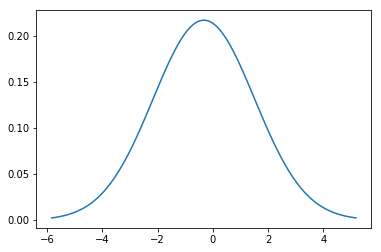

-0.3253137254901959
3.367516859607843


In [7]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)